In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cardio_train.csv", sep=';')

In [3]:
print("Dataset shape:", df.shape)
print(df.head())
print(df.info())
print(df.isnull().sum()) 

Dataset shape: (70000, 13)
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height      

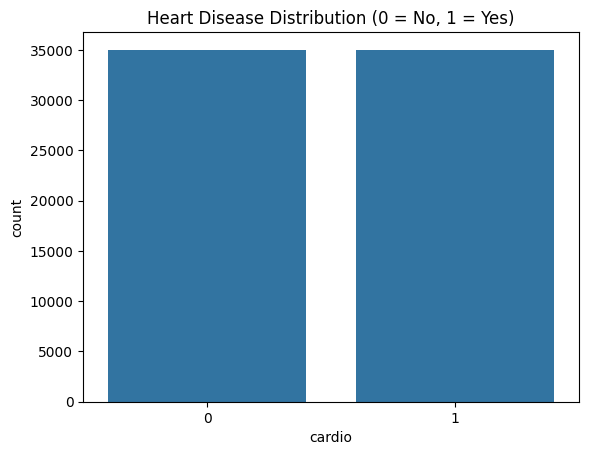

In [4]:
sns.countplot(x='cardio', data=df)
plt.title('Heart Disease Distribution (0 = No, 1 = Yes)')
plt.show()


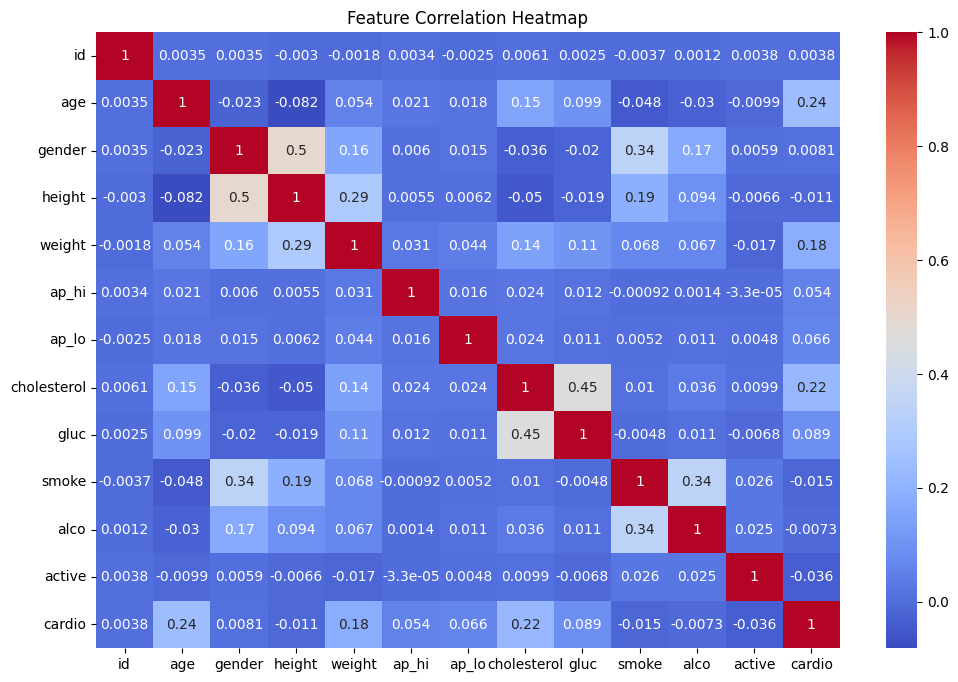

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
X = df.drop(['id', 'cardio'], axis=1)
y = df['cardio']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    return accuracy_score(y_test, y_pred)

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
accuracies = {}
for name, model in models.items():
    print(f"--- {name} ---")
    acc = evaluate_model(model, X_train, X_test, y_train, y_test)
    accuracies[name] = acc
    print("\n")

--- Logistic Regression ---
Accuracy: 71.39%
Confusion Matrix:
[[5271 1733]
 [2273 4723]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.68      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000



--- K-Nearest Neighbors ---
Accuracy: 65.06%
Confusion Matrix:
[[4663 2341]
 [2551 4445]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      7004
           1       0.66      0.64      0.65      6996

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000



--- Support Vector Machine ---


In [ ]:
# 11b. Tune Random Forest with more estimators and depth
from sklearn.ensemble import RandomForestClassifier

print("---- Tuned Random Forest ----")
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0.7, 1)
plt.show()

In [ ]:
best_model_name = max(accuracies, key=accuracies.get)
print(f"Best Model: {best_model_name} with accuracy {accuracies[best_model_name]*100:.2f}%")

best_model = models[best_model_name]
best_model.fit(X_train, y_train)